In [166]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from datetime import date, time, datetime
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, precision_recall_fscore_support

**Load the excel file from google drive into the variable "df"**

In [167]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")
#df_copy = pd.read_excel("/content/drive/MyDrive/GNG5300/MedicalCentre.xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
df = df.rename(columns={"No-show":"NoShow"})
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [169]:
# Binary 1s and 0s column 'output'. NoShow yes=1, NoShow no=0
df['output'] = (df['NoShow'] == 'Yes').astype('int')

In [170]:
# overall unique possible columns
for column in df.iloc[:,np.r_[2,5:14]].columns:
    print("{}:\n{}".format(column,df[column].unique()))

Gender:
['F' 'M']
Age:
[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Neighbourhood:
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÃšBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃƒO PEDRO' 'SANTA MARTHA'
 'SÃƒO CRISTÃ“VÃƒO' 'MARUÃ\x8dPE' 'GRANDE VITÃ“RIA' 'SÃƒO BENEDITO'
 'ILHA DAS CAIEIRAS' 'SANTO ANDRÃ‰' 'SOLON BORGES' 'BONFIM'
 'JARDIM CAMBURI' 'MARIA ORTIZ' 'JABOUR' 'ANTÃ”NIO HONÃ“RIO'
 'RESISTÃŠNCIA' 'ILHA DE SANTA MARIA' 'JUCUTUQUARA' 'MONTE BELO'
 'MÃ\x81RIO CYPRESTE' 'SANTO ANTÃ”NIO' 'BELA VISTA' 'PRAIA DO SUÃ\x81'
 'SANTA HELENA' 'ITA

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NoShow          110527 non-null  object 
 14  output          110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


In [172]:
df.head(50)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃšBLICA,0,1,0,0,0,0,No,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0


# Feature Engineering

**Check for missing values in the data. Using the info() function. All columns are have 110527 entries. This means, there is no missing value**

In [173]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  NoShow          110527 non-null  object 
 14  output          110527 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
NoShow            0
output            0
dtype: int64

**Determine the frequency of distinct values in each feature set**

In [174]:
# Numerical features
numerical_features = ["PatientId","AppointmentID","ScheduledDay","AppointmentDay","Age","Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]
# Categorical features
categorical_features = ["Gender","Neighbourhood","NoShow", "output"]

# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())

# Printing unique values in each categorical features
for a in categorical_features:
    print("------------------categorical_feature----------------------"+a+": ")
    #print(sorted(df[a].unique()))
    print(df[a].value_counts())

------------------numerical_feature----------------------PatientId: 
8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
                ..
8.622636e+11     1
9.267587e+12     1
5.764356e+12     1
5.712491e+12     1
1.557663e+13     1
Name: PatientId, Length: 62299, dtype: int64
------------------numerical_feature----------------------AppointmentID: 
5642903    1
5692618    1
5687640    1
5740664    1
5740598    1
          ..
5718442    1
5426425    1
5424230    1
5720832    1
5629448    1
Name: AppointmentID, Length: 110527, dtype: int64
------------------numerical_feature----------------------ScheduledDay: 
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: ScheduledDay, Length: 103549, dtype:

**Count the frequency of negative Age feature observations, and remove them**

In [175]:
print("Before removing the negative age")
print("--------------------------------")
print( df['Age'].value_counts() )
# Get names of indexes for which column Age has value less than 0
a = df.index[df['Age'] < 0]
print (a)
df = df.drop(index=a)
print("\nAfter removing the negative age")
print("--------------------------------")
print( df['Age'].value_counts() )

Before removing the negative age
--------------------------------
 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
Int64Index([99832], dtype='int64')

After removing the negative age
--------------------------------
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64


In [176]:
df.info() # After removing the negative age row, the count is now 110526 rows. Previously it was 110527 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   Scholarship     110526 non-null  int64  
 8   Hipertension    110526 non-null  int64  
 9   Diabetes        110526 non-null  int64  
 10  Alcoholism      110526 non-null  int64  
 11  Handcap         110526 non-null  int64  
 12  SMS_received    110526 non-null  int64  
 13  NoShow          110526 non-null  object 
 14  output          110526 non-null  int64  
dtypes: float64(1), int64(9), object(5)
memory usage: 13.5+ MB


**ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code**

In [177]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÃšBLICA,0,1,0,0,0,0,No,0
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,1
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,1
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No,0
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No,0


In [178]:
# Using laberl encoder to convert non-numeric data into numberic data
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender) #F=0, M=1
df.Neighbourhood = le.fit_transform(df.Neighbourhood)
df.NoShow = le.fit_transform(df.NoShow) #No=0, Yes=1

In [179]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,39,0,1,1,0,0,0,0,0
5,9.598513e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,58,0,1,0,0,0,0,0,0
6,7.336882e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,25,0,0,0,0,0,0,1,1
7,3.449833e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,25,0,0,0,0,0,0,1,1
8,5.639473e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,1,0,0,0,0,0,0,0,0
9,7.812456e+13,5629123,0,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,12,0,0,0,0,0,0,0,0


**Break the date features into date components. WaitingTime = Appointimet - Scheduled. IF the waiting times are negative, take the abs. To do this, I made the appointment and scheduled times as datetime64 formats. Other ways explored is to break the dates in month, day, year and then take the difference of the days.**

In [180]:
print ("df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
df.dtypes

df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------


PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow              int64
output              int64
dtype: object

In [181]:
df['ScheduledDay'] = df['ScheduledDay'].astype('string')
df['AppointmentDay'] = df['AppointmentDay'].astype('string')

In [182]:
print ("\ndf.dtypes prior to changing the ScheduledDay and AppointmentDay to string type")
print ("----------------------------------------------------------------------------------")
df.dtypes


df.dtypes prior to changing the ScheduledDay and AppointmentDay to string type
----------------------------------------------------------------------------------


PatientId         float64
AppointmentID       int64
Gender              int64
ScheduledDay       string
AppointmentDay     string
Age                 int64
Neighbourhood       int64
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
NoShow              int64
output              int64
dtype: object

In [183]:
# Code to remove the T and Z characters after changing the ScheduledDay and AppointmentDay to string type
for index, row in df.iterrows():
  temp = df['AppointmentDay'][index]
  temp = df['AppointmentDay'][index].replace('T',' ').replace('Z','')
  df['AppointmentDay'][index] = temp
  temp2 = df['ScheduledDay'][index]
  temp2 = df['ScheduledDay'][index].replace('T',' ').replace('Z','')
  df['ScheduledDay'][index] = temp2

print ("\nT and Z characters removed from ScheduledDay and AppointmentDay")
print ("-----------------------------------------------------------------")


T and Z characters removed from ScheduledDay and AppointmentDay
-----------------------------------------------------------------


In [184]:
print ("\nNow, change ScheduledDay and AppointmentDay to datetime64 format")
print ("-----------------------------------------------------------------")

df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])


Now, change ScheduledDay and AppointmentDay to datetime64 format
-----------------------------------------------------------------


In [185]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,39,0,1,1,0,0,0,0,0


In [186]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,0.350026,37.089219,41.737121,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,0.201934
std,2.560943e+14,7.129544e+04,0.476980,23.110026,22.361668,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [187]:
# Check for the appointments that were scheduled after the appointment datetimes.
# Around 38568 appointments that were scheduled after the appointment datetimes
(df['ScheduledDay']>df['AppointmentDay']).sum()

38567

In [188]:
# appointment times were set at the earliest time (00:00:00) whereas the times are included in ScheduledDay
# shift all the appointment times to the end of the day
df['AppointmentDay'] = df['AppointmentDay'] +pd.Timedelta('1d') - pd.Timedelta('1s')

In [189]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,56,43,0,0,0,0,0,1,0,0
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,51,43,0,0,0,0,0,1,0,0
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,21,43,0,0,0,0,0,1,0,0
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,38,43,0,0,0,0,0,1,0,0


In [190]:
# Now after the adjustment, Check for the appointments that were scheduled after the appointment datetimes.
# Around 5 appointments that were scheduled after the appointment datetimes. Remove them.
(df['ScheduledDay']>df['AppointmentDay']).sum()

5

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  float64       
 1   AppointmentID   110526 non-null  int64         
 2   Gender          110526 non-null  int64         
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  int64         
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  NoShow          110526 non-null  int64         
 14  output          110526 non-null  int

In [192]:
df = df.loc[(df['ScheduledDay'] <= df['AppointmentDay'])].copy()

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110521 non-null  float64       
 1   AppointmentID   110521 non-null  int64         
 2   Gender          110521 non-null  int64         
 3   ScheduledDay    110521 non-null  datetime64[ns]
 4   AppointmentDay  110521 non-null  datetime64[ns]
 5   Age             110521 non-null  int64         
 6   Neighbourhood   110521 non-null  int64         
 7   Scholarship     110521 non-null  int64         
 8   Hipertension    110521 non-null  int64         
 9   Diabetes        110521 non-null  int64         
 10  Alcoholism      110521 non-null  int64         
 11  Handcap         110521 non-null  int64         
 12  SMS_received    110521 non-null  int64         
 13  NoShow          110521 non-null  int64         
 14  output          110521 non-null  int

In [194]:
# Individual columns for day, month, week and year for schedule and appointment day columns.

df['ScheduledDay_yr'] = df['ScheduledDay'].dt.year.astype(int)
df['AppointmentDay_yr'] = df['AppointmentDay'].dt.year.astype(int)

df['ScheduledDay_mnth'] = df['ScheduledDay'].dt.month.astype(int)
df['AppointmentDay_mnth'] = df['AppointmentDay'].dt.month.astype(int)

df['ScheduledDay_week'] = df['ScheduledDay'].dt.isocalendar().week.astype(int)
df['AppointmentDay_week'] = df['AppointmentDay'].dt.isocalendar().week.astype(int)

df['ScheduledDay_day'] = df['ScheduledDay'].dt.day.astype(int)
df['AppointmentDay_day'] = df['AppointmentDay'].dt.day.astype(int)

df['ScheduledDay_hr'] = df['ScheduledDay'].dt.hour.astype(int)
df['AppointmentDay_hr'] = df['AppointmentDay'].dt.hour.astype(int)

df['ScheduledDay_min'] = df['ScheduledDay'].dt.minute.astype(int)
df['AppointmentDay_min'] = df['AppointmentDay'].dt.minute.astype(int)

df['ScheduledDay_weekday'] = df['ScheduledDay'].dt.dayofweek.astype(int)
df['AppointmentDay_weekday'] = df['AppointmentDay'].dt.dayofweek.astype(int)


In [195]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,56,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,51,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,21,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,38,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1


In [196]:
# Create schedule to appointment number of days 'schd_to_appt_days_diff' column
df['schd_to_appt_days_diff'] = (df.AppointmentDay - df.ScheduledDay).dt.days

In [197]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.0,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,0.350024,37.089386,41.736403,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,0.201898,2015.999439,2016.0,4.823852,5.210051,18.744619,20.168891,14.252513,12.499679,10.774522,23.0,28.996806,59.0,1.851965,1.858280,10.184345
std,2.560860e+14,7.129691e+04,0.476979,23.109885,22.361379,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,0.401419,0.023678,0.0,0.715811,0.473785,2.802823,1.775236,9.345736,9.056581,3.216204,0.0,17.253466,0.0,1.378539,1.371677,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2016.0,1.000000,4.000000,1.000000,17.000000,1.000000,1.000000,6.000000,23.0,0.000000,59.0,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,4.000000,5.000000,17.000000,19.000000,6.000000,5.000000,8.000000,23.0,14.000000,59.0,1.000000,1.000000,0.000000
50%,3.173185e+13,5.680573e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,19.000000,20.000000,13.000000,10.000000,10.000000,23.0,29.000000,59.0,2.000000,2.000000,4.000000
75%,9.438963e+13,5.725524e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,20.000000,22.000000,22.000000,19.000000,13.000000,23.0,44.000000,59.0,3.000000,3.000000,15.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2016.000000,2016.0,12.000000,6.000000,51.000000,23.000000,31.000000,31.000000,21.000000,23.0,59.000000,59.0,5.000000,5.000000,179.000000


In [198]:
# Check if there is any error...negative difference between scheduled and appointment days
# Find the number of rows where this error occured
df['schd_to_appt_days_diff'].lt(0).sum()

0

In [199]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.0,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,0.350024,37.089386,41.736403,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,0.201898,2015.999439,2016.0,4.823852,5.210051,18.744619,20.168891,14.252513,12.499679,10.774522,23.0,28.996806,59.0,1.851965,1.858280,10.184345
std,2.560860e+14,7.129691e+04,0.476979,23.109885,22.361379,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,0.401419,0.023678,0.0,0.715811,0.473785,2.802823,1.775236,9.345736,9.056581,3.216204,0.0,17.253466,0.0,1.378539,1.371677,15.255153
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2016.0,1.000000,4.000000,1.000000,17.000000,1.000000,1.000000,6.000000,23.0,0.000000,59.0,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,4.000000,5.000000,17.000000,19.000000,6.000000,5.000000,8.000000,23.0,14.000000,59.0,1.000000,1.000000,0.000000
50%,3.173185e+13,5.680573e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,19.000000,20.000000,13.000000,10.000000,10.000000,23.0,29.000000,59.0,2.000000,2.000000,4.000000
75%,9.438963e+13,5.725524e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,20.000000,22.000000,22.000000,19.000000,13.000000,23.0,44.000000,59.0,3.000000,3.000000,15.000000
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2016.000000,2016.0,12.000000,6.000000,51.000000,23.000000,31.000000,31.000000,21.000000,23.0,59.000000,59.0,5.000000,5.000000,179.000000


In [200]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,56,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,51,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,21,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,38,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41


In [201]:
# Another quick way to get the difference of scheduled and appointment days is to just take the difference and take abs.

print ("\nAdd a new column of WaitingTime. It will be the difference (in days) of ScheduledDay and AppointmentDay")
print ("---------------------------------------------------------------------------------------------------------")
df['WaitingTime'] = (abs(df['AppointmentDay'] - df['ScheduledDay']))/np.timedelta64(1,'D')
#df = df[['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','NoShow' ]]

# Assignment asks to transform the WaitingTime to positive numbers.
# Negative WaitingTime means that patients didn't have to wait at all
# Since negative waittimes are not realistic, one option can be to make
# < 0 WaitingTime to be 0. But then there will be too many 0s waitingtime and
# rest of them will be outliers. Hence, for the assignment, I have taken the abs above
# (abs(df['AppointmentDay'] - df['ScheduledDay']))/np.timedelta64(1,'D')
#
#for index, row in df.iterrows():
#  if(df['WaitingTime'][index] < 0):
#    df['WaitingTime'][index] = 0


Add a new column of WaitingTime. It will be the difference (in days) of ScheduledDay and AppointmentDay
---------------------------------------------------------------------------------------------------------


In [202]:
# As we can see below, schd_to_appt_days_diff and WaitingTime columns are similar
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,56,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,51,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,21,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,38,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


In [203]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
5,9.598513e+13,5626772,0,2016-04-27 08:36:51,2016-04-29 23:59:59,76,58,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,27,29,8,23,36,59,2,4,2,2.641065
6,7.336882e+14,5630279,0,2016-04-27 15:05:12,2016-04-29 23:59:59,23,25,0,0,0,0,0,0,1,1,2016,2016,4,4,17,17,27,29,15,23,5,59,2,4,2,2.371377
7,3.449833e+12,5630575,0,2016-04-27 15:39:58,2016-04-29 23:59:59,39,25,0,0,0,0,0,0,1,1,2016,2016,4,4,17,17,27,29,15,23,39,59,2,4,2,2.347234
8,5.639473e+13,5638447,0,2016-04-29 08:02:16,2016-04-29 23:59:59,21,1,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,8,23,2,59,4,4,0,0.665081
9,7.812456e+13,5629123,0,2016-04-27 12:48:25,2016-04-29 23:59:59,19,12,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,27,29,12,23,48,59,2,4,2,2.466366


In [204]:
# Check the percentage of NoShow = 1
# sum all the elements of the NoShow column. 0s(NoShow=no) won't contribute to this as 1+0=1
# percentageNoShowYes:  0.20. This means probability of 1/5.
# 1 in 5 patients will miss the scheduled appointments.

percentageNoShowYes=sum(df['NoShow'])/len(df['NoShow'])
print ("percentageNoShowYes: ", percentageNoShowYes)

output1=sum(df['output'])/len(df['output'])
print ("output1: ", output1)

percentageNoShowYes:  0.2018982817745044
output1:  0.2018982817745044


In [215]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.0,110521.000000,110521.0,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,0.350024,37.089386,41.736403,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,0.201898,0.201898,2015.999439,2016.0,4.823852,5.210051,18.744619,20.168891,14.252513,12.499679,10.774522,23.0,28.996806,59.0,1.851965,1.858280,10.184345,10.714917
std,2.560860e+14,7.129691e+04,0.476979,23.109885,22.361379,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,0.401419,0.401419,0.023678,0.0,0.715811,0.473785,2.802823,1.775236,9.345736,9.056581,3.216204,0.0,17.253466,0.0,1.378539,1.371677,15.255153,15.244229
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,2016.0,1.000000,4.000000,1.000000,17.000000,1.000000,1.000000,6.000000,23.0,0.000000,59.0,0.000000,0.000000,0.000000,0.135475
25%,4.172457e+12,5.640284e+06,0.000000,18.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,4.000000,5.000000,17.000000,19.000000,6.000000,5.000000,8.000000,23.0,14.000000,59.0,1.000000,1.000000,0.000000,0.653866
50%,3.173185e+13,5.680573e+06,0.000000,37.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,19.000000,20.000000,13.000000,10.000000,10.000000,23.0,29.000000,59.0,2.000000,2.000000,4.000000,4.475000
75%,9.438963e+13,5.725524e+06,1.000000,55.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,20.000000,22.000000,22.000000,19.000000,13.000000,23.0,44.000000,59.0,3.000000,3.000000,15.000000,15.320637
max,9.999816e+14,5.790484e+06,1.000000,115.000000,80.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2016.000000,2016.0,12.000000,6.000000,51.000000,23.000000,31.000000,31.000000,21.000000,23.0,59.000000,59.0,5.000000,5.000000,179.000000,179.554861


In [205]:
noshow = df.NoShow == 1
show = df.NoShow == 0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text major ticklabel objects>)

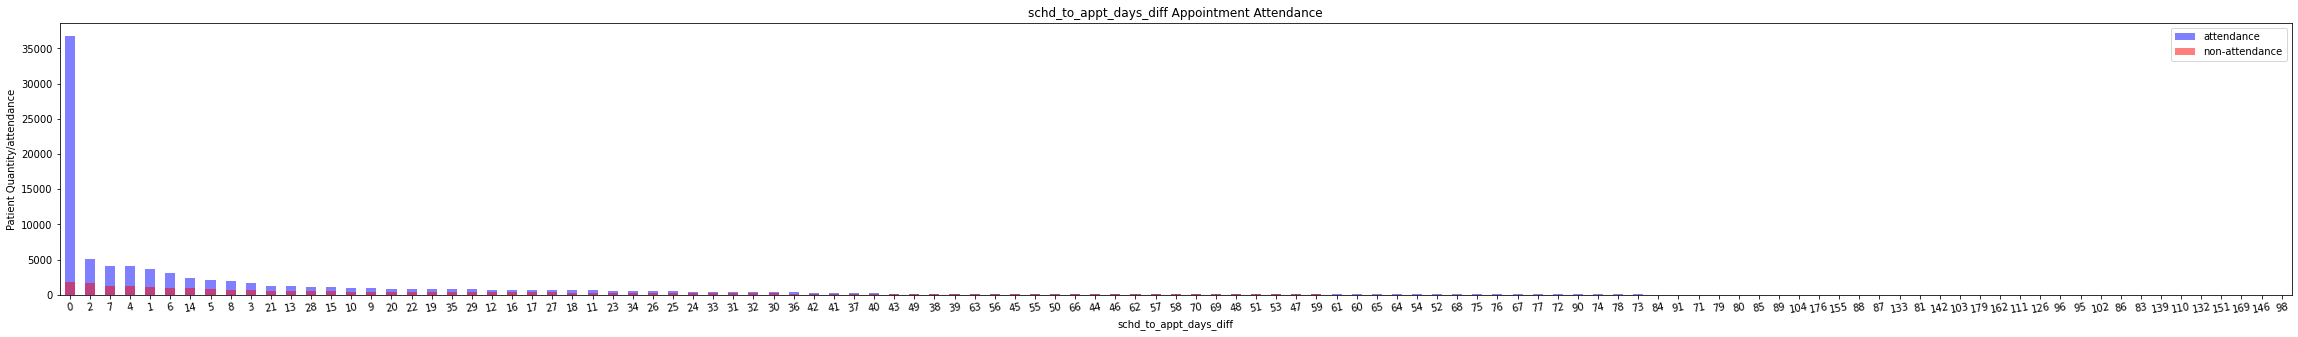

In [225]:
# More people showed up on appointments when the delta of appointment and scheduled day is less.
fig = plt.figure(figsize = (40,5))
df.schd_to_appt_days_diff[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.schd_to_appt_days_diff[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('schd_to_appt_days_diff Appointment Attendance')
plt.xlabel('schd_to_appt_days_diff')
plt.ylabel('Patient Quantity/attendance')
plt.xticks(rotation=10)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

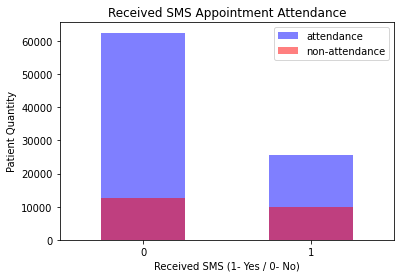

In [158]:
# People who didn't receive SMS show up more on their appointments
df.SMS_received[show].value_counts().plot(kind='bar', alpha=0.5, color='blue', label='attendance')
df.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.5, color='red', label='non-attendance')
plt.legend()
plt.title('Received SMS Appointment Attendance')
plt.xlabel('Received SMS (1- Yes / 0- No)')
plt.ylabel('Patient Quantity')
plt.xticks(rotation=0)

**Check for Outliers Using Box plots**

Text(0.5, 0, 'Age ')

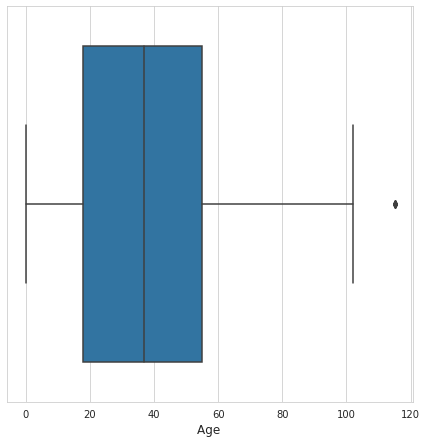

In [226]:
# Check and focus on Age
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age ', fontsize = 12)

# Uncomment if box plots are required for other variables
#plt.subplot(5,2,1)
#sns.boxplot(x=df['Gender'],data=df)
#plt.xlabel('Gender ', fontsize = 12)
#plt.subplot(5,2,2)
#sns.boxplot(x=df['WaitingTime'],data=df)
#plt.xlabel('WaitingTime ', fontsize = 12)
#plt.subplot(5,2,3)
#sns.boxplot(x=df['Age'],data=df)
#plt.xlabel('Age ', fontsize = 12)
#plt.subplot(5,2,4)
#sns.boxplot(x=df['Neighbourhood'],data=df)
#plt.xlabel('Neighbourhood ', fontsize = 12)
#plt.subplot(5,2,5)
#sns.boxplot(x=df['Scholarship'],data=df)
#plt.xlabel('Scholarship ', fontsize = 12)
#plt.subplot(5,2,6)
#sns.boxplot(x=df['Hipertension'],data=df)
#plt.xlabel('Hipertension ', fontsize = 12)
#plt.subplot(5,2,7)
#sns.boxplot(x=df['Diabetes'],data=df)
#plt.xlabel('Diabetes ', fontsize = 12)
#plt.subplot(5,2,8)
#sns.boxplot(x=df['Alcoholism'],data=df)
#plt.xlabel('Alcoholism ', fontsize = 12)
#plt.subplot(5,2,9)
#sns.boxplot(x=df['Handcap'],data=df)
#plt.xlabel('Handcap ', fontsize = 12)
#plt.subplot(5,2,10)
#sns.boxplot(x=df['SMS_received'],data=df)
#plt.xlabel('SMS_received ', fontsize = 12)

In [227]:
# Check the shape
print ("Shape of the dataframe prior to removig the Age outliers")
print ("--------------------------------------------------------")
df.shape

Shape of the dataframe prior to removig the Age outliers
--------------------------------------------------------


(110521, 31)

In [228]:
# Identify the outliers in Age.
Q1=df['Age'].quantile(0.25)
Q3=df['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR
print(Lower_Whisker, Upper_Whisker)
df = df[df['Age']< Upper_Whisker]

18.0
55.0
37.0
-37.5 110.5


In [229]:
# Check the shape
print ("Shape of the dataframe After to removig the Age outliers")
print ("---------------------------------------------------------")
df.shape

Shape of the dataframe After to removig the Age outliers
---------------------------------------------------------


(110516, 31)

Text(0.5, 0, 'Age with Outliers Removed ')

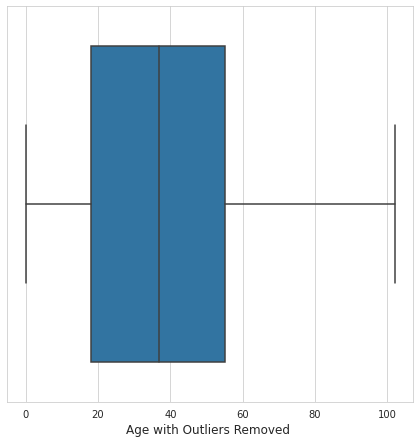

In [230]:
# After removing the Age outliers
plt.figure(figsize=(16,16))
sns.set_style(style='whitegrid')
plt.subplot(2,2,1)
sns.boxplot(x=df['Age'],data=df)
plt.xlabel('Age with Outliers Removed ', fontsize = 12)

**Earlier, we determined the frequency of distinct values in each feature set. Observed that Handicap has most values in 0s with rest in 1 2 3 and 4. Consider them as outliers and also replace them with median.**

In [231]:
# Numerical features
numerical_features = ["Handcap"]


# Printing unique values in each numerical_feature
for b in numerical_features:
    print("------------------numerical_feature----------------------"+b+": ")
    #print(sorted(df[b].unique()))
    print(df[b].value_counts())


------------------numerical_feature----------------------Handcap: 
0    108281
1      2036
2       183
3        13
4         3
Name: Handcap, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a48a0bbd0>]],
      dtype=object)

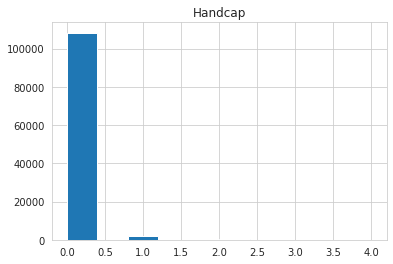

In [232]:
df.hist(column='Handcap')
# have a skewed distribution, so the mean is more affected by outliers than the median
# median is a better choice to replace the 1s, 2s, 3s, and 4s.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a4890b410>]],
      dtype=object)

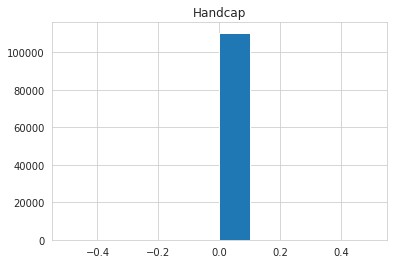

In [234]:
df['Handcap']=df['Handcap'].replace(1,df['Handcap'].median())#skewed distribution
df['Handcap']=df['Handcap'].replace(2,df['Handcap'].median())#skewed distribution
df['Handcap']=df['Handcap'].replace(3,df['Handcap'].median())#skewed distribution
df['Handcap']=df['Handcap'].replace(4,df['Handcap'].median())#skewed distribution
df.hist(column='Handcap')

**Standardization**

In [235]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,62,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,56,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,62,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,8,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,56,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,56,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,51,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,21,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,38,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


In [236]:
# Normalization 
# The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range.
#columns_to_standardize = ['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','WaitingTime','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received','No-show']
columns_to_standardize = ['Age']
df[columns_to_standardize] = MinMaxScaler().fit_transform(df[columns_to_standardize])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [237]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29 23:59:59,0.607843,39,0,1,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29 23:59:59,0.549020,39,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29 23:59:59,0.607843,45,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29 23:59:59,0.078431,54,0,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29 23:59:59,0.549020,39,0,1,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07 23:59:59,0.549020,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07 23:59:59,0.500000,43,0,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07 23:59:59,0.205882,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07 23:59:59,0.372549,43,0,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


In [238]:
df.describe()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
count,1.105160e+05,1.105160e+05,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.0,110516.000000,110516.000000,110516.000000,110516.000000,110516.0,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.000000,110516.0,110516.000000,110516.0,110516.000000,110516.000000,110516.000000,110516.000000
mean,1.474894e+14,5.675304e+06,0.350040,0.363587,41.737567,0.098275,0.197257,0.071872,0.030403,0.0,0.321049,0.201880,0.201880,2015.999439,2016.0,4.823854,5.210051,18.744598,20.168862,14.252353,12.499457,10.774576,23.0,28.996634,59.0,1.851985,1.858274,10.184272,10.714841
std,2.560844e+14,7.129723e+04,0.476984,0.226514,22.360305,0.297688,0.397929,0.258277,0.171694,0.0,0.466882,0.401405,0.401405,0.023679,0.0,0.715822,0.473788,2.802825,1.775258,9.345795,9.056540,3.216228,0.0,17.253516,0.0,1.378517,1.371662,15.255201,15.244279
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2015.000000,2016.0,1.000000,4.000000,1.000000,17.000000,1.000000,1.000000,6.000000,23.0,0.000000,59.0,0.000000,0.000000,0.000000,0.135475
25%,4.172457e+12,5.640284e+06,0.000000,0.176471,26.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,2016.0,4.000000,5.000000,17.000000,19.000000,6.000000,5.000000,8.000000,23.0,14.000000,59.0,1.000000,1.000000,0.000000,0.653863
50%,3.173016e+13,5.680570e+06,0.000000,0.362745,40.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,19.000000,20.000000,13.000000,10.000000,10.000000,23.0,29.000000,59.0,2.000000,2.000000,4.000000,4.475162
75%,9.439068e+13,5.725524e+06,1.000000,0.539216,60.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,2016.000000,2016.0,5.000000,5.000000,20.000000,22.000000,22.000000,19.000000,13.000000,23.0,44.000000,59.0,3.000000,3.000000,15.000000,15.320611
max,9.999816e+14,5.790484e+06,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,2016.000000,2016.0,12.000000,6.000000,51.000000,23.000000,31.000000,31.000000,21.000000,23.0,59.000000,59.0,5.000000,5.000000,179.000000,179.554861


**Conduct variability comparison between features using a correlation matrix & drop correlated features**

In [239]:
df.drop(['PatientId', 'AppointmentID','ScheduledDay','AppointmentDay','Handcap'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [240]:
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,0,0.607843,39,0,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,1,0.549020,39,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,0,0.607843,45,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,0,0.078431,54,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,0,0.549020,39,0,1,1,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0.549020,43,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,0,0.500000,43,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,0,0.205882,43,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,0,0.372549,43,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


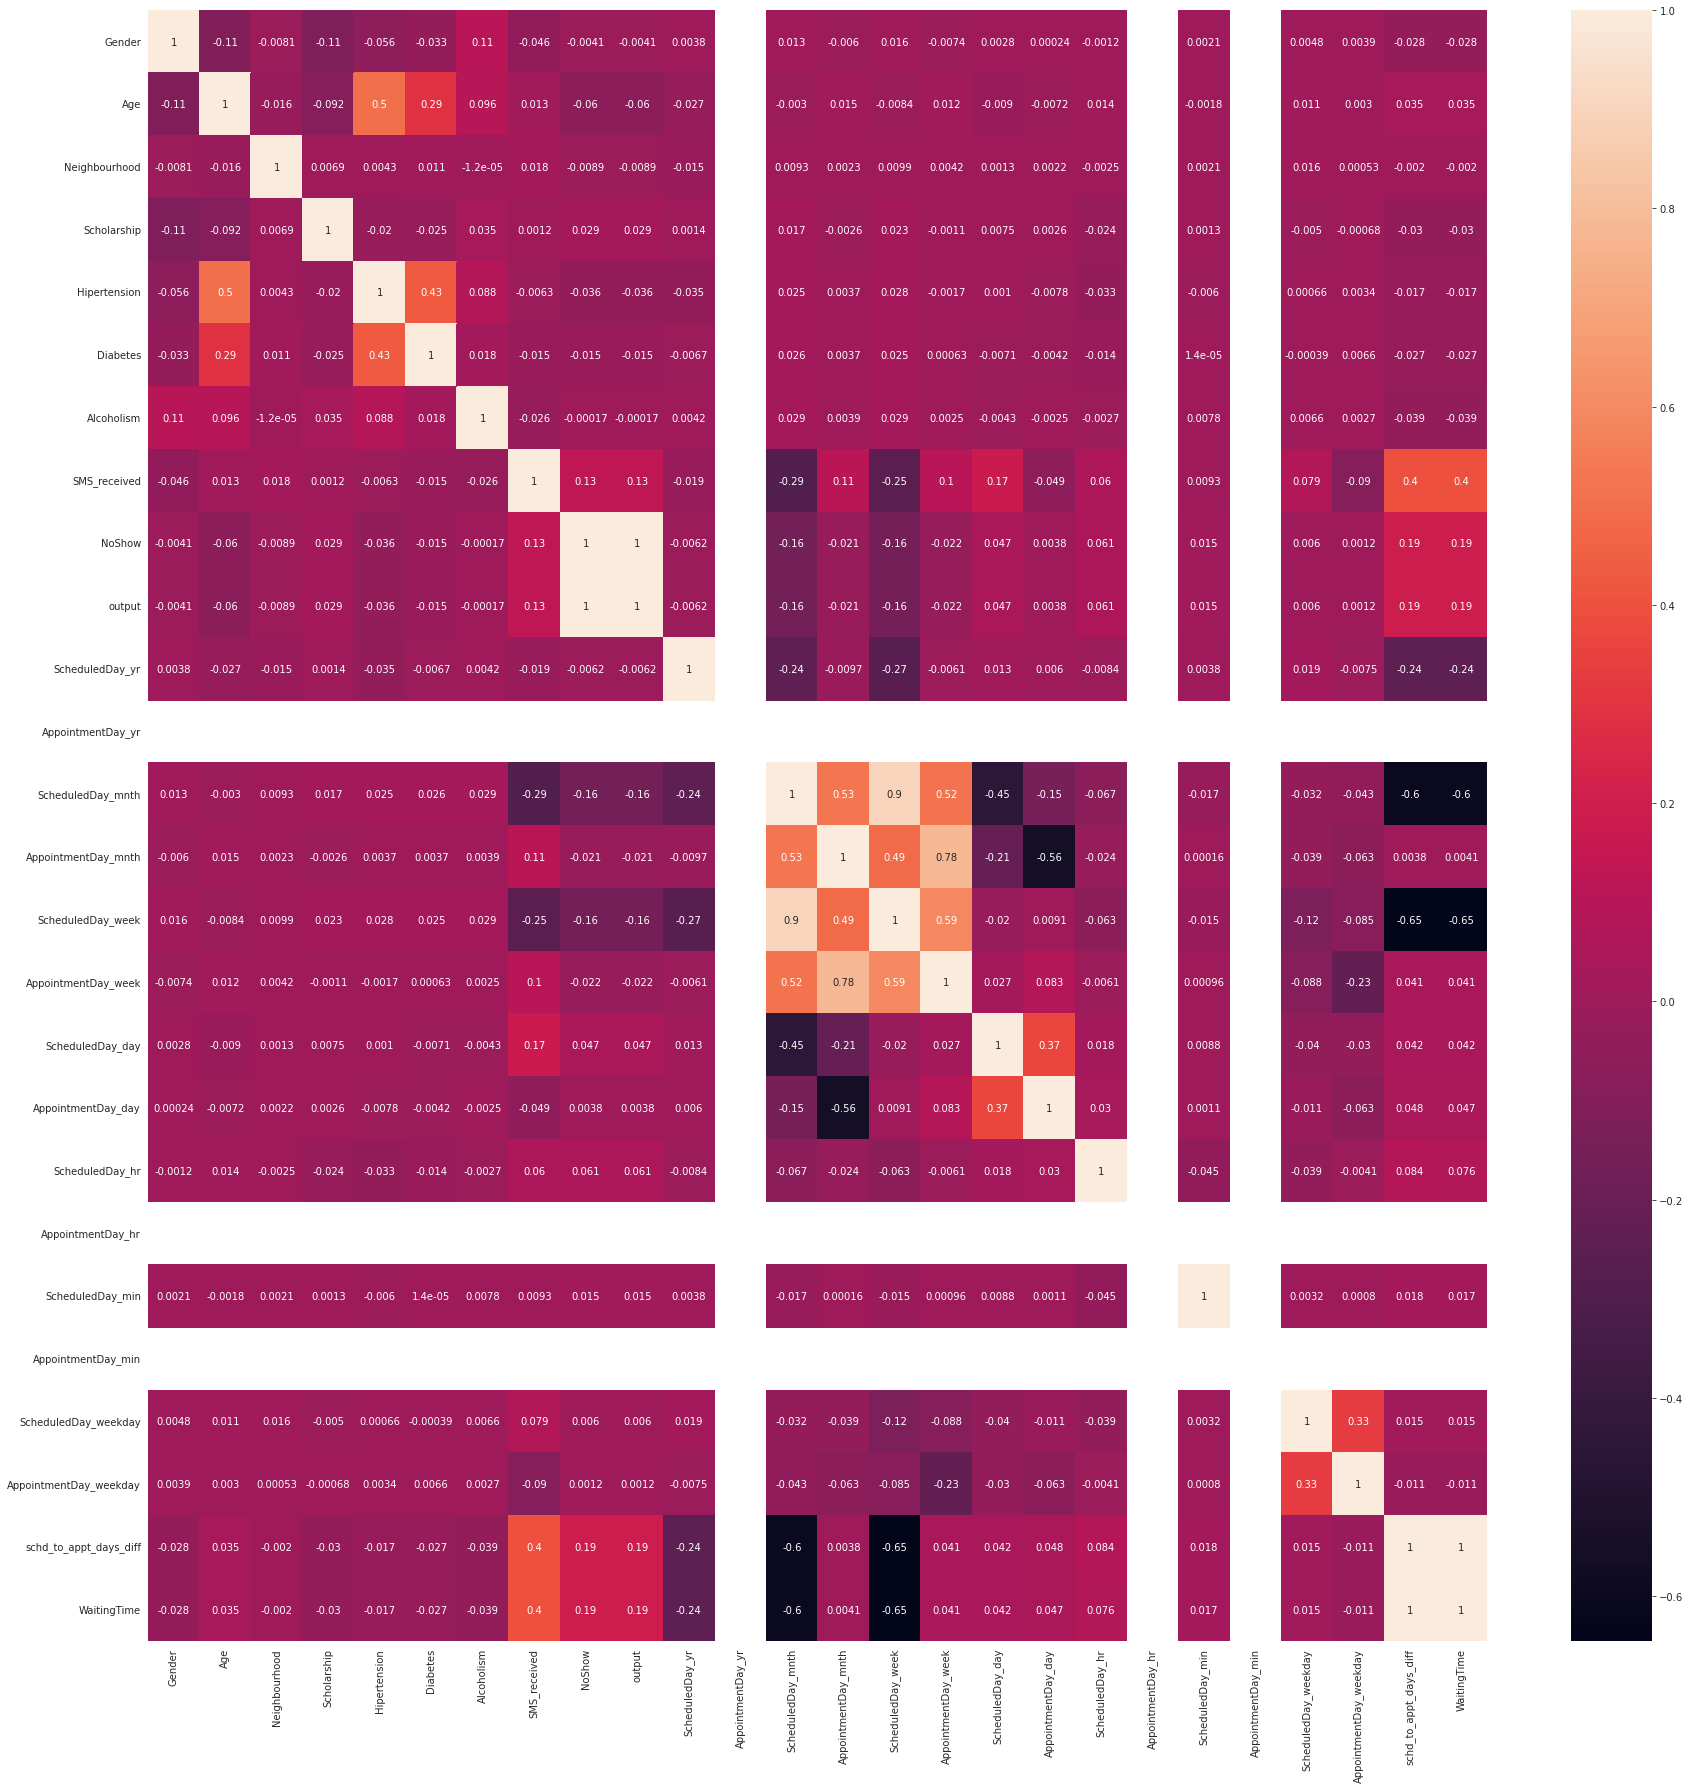

In [243]:
fig, ax = plt.subplots(figsize=(30,30))
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

# Model Development

**Develop a Naïve Bayes classifier to predict the outcome of the test using Python. The performance of the classifier should be evaluated by partitioning the dataset into a train dataset (70%) and test dataset (30%). Use the train dataset to build the Naïve Bayes and the test dataset to evaluate how well the model generalizes to future results.**

In [244]:
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,0,0.607843,39,0,1,0,0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,1,0.549020,39,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,0,0.607843,45,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,0,0.078431,54,0,0,0,0,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,0,0.549020,39,0,1,1,0,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,0,0.549020,43,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,0,0.500000,43,0,0,0,0,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,0,0.205882,43,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,0,0.372549,43,0,0,0,0,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


In [245]:
df.drop(['Gender','Age','Neighbourhood','Scholarship','Hipertension','Diabetes','Alcoholism'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Split the Data Frame into X and y**

In [246]:
df

,SMS_received,NoShow,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,0,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,0,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,0,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,0,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1,0,0,2016,2016,5,6,18,23,3,7,9,23,15,59,1,1,35,35.614167
110523,1,0,0,2016,2016,5,6,18,23,3,7,7,23,27,59,1,1,35,35.689190
110524,1,0,0,2016,2016,4,6,17,23,27,7,16,23,3,59,2,1,41,41.330637
110525,1,0,0,2016,2016,4,6,17,23,27,7,15,23,9,59,2,1,41,41.368472


In [247]:
target_name='NoShow'
y= df[target_name]#given predictions - training data 
X=df.drop(target_name,axis=1)#dropping the NoShow column and keeping all other columns as X

In [248]:
X.head() # contains only independent features 

,SMS_received,output,ScheduledDay_yr,AppointmentDay_yr,ScheduledDay_mnth,AppointmentDay_mnth,ScheduledDay_week,AppointmentDay_week,ScheduledDay_day,AppointmentDay_day,ScheduledDay_hr,AppointmentDay_hr,ScheduledDay_min,AppointmentDay_min,ScheduledDay_weekday,AppointmentDay_weekday,schd_to_appt_days_diff,WaitingTime
0,0,0,2016,2016,4,4,17,17,29,29,18,23,38,59,4,4,0,0.223507
1,0,0,2016,2016,4,4,17,17,29,29,16,23,8,59,4,4,0,0.327454
2,0,0,2016,2016,4,4,17,17,29,29,16,23,19,59,4,4,0,0.320081
3,0,0,2016,2016,4,4,17,17,29,29,17,23,29,59,4,4,0,0.271157
4,0,0,2016,2016,4,4,17,17,29,29,16,23,7,59,4,4,0,0.328194


In [249]:
y.head() #contains dependent feature

0    0
1    0
2    0
3    0
4    0
Name: NoShow, dtype: int64

TRAIN TEST SPLIT
Train: 70%, Test: 30%

In [250]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)#splitting data in 70% train, 30%test

In [251]:
X_train.shape,y_train.shape

((77361, 18), (77361,))

In [252]:
X_test.shape,y_test.shape

((33155, 18), (33155,))

**Naive Bayes** is classification approach that adopts the principle of class conditional independence from the Bayes Theorem. This means that the presence of one feature does not impact the presence of another in the probability of a given outcome, and each predictor has an equal effect on that result

In [254]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

NameError: ignored

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[26539     0]
 [ 6618     0]]
0.8004041378894351


In [ ]:
# confusion matrix
y_act = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_act, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
df_confusion

Predicted,0,All
Actual,,
0,7907,7907
1,2032,2032
All,9939,9939


In [ ]:
# minority class recall and precision
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26539
           1       0.00      0.00      0.00      6618

    accuracy                           0.80     33157
   macro avg       0.40      0.50      0.44     33157
weighted avg       0.64      0.80      0.71     33157



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


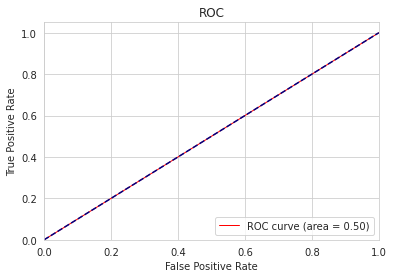

In [ ]:
# ROC (Ref- https://qiita.com/bmj0114/items/460424c110a8ce22d945)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

**Below code not validated**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
best_model= nbModel_grid.fit(X_train, y_train)

In [ ]:
nb_pred=best_model.predict(X_test)

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred))